In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
import numpy as np

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict 

In [11]:
pwd

'C:\\Users\\KIIT'

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
df=pd.read_csv(r"C:\Users\KIIT\Downloads\train.csv\train.csv",encoding='latin',index_col=0)
df=df.dropna()
df.count()

title     18285
author    18285
text      18285
label     18285
dtype: int64

In [15]:
df.head(5)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [55]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word,pos='v') for word in words if word not in set(stopwords.words('english'))]
    return ' '.join(words)

# Apply the preprocessing function to the 'text_column' (replace with your actual column name)
df['preprocessed_text'] = df['title'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(df['preprocessed_text'])

id
0        House Dem Aide : We Didnât Even See Comeyâ...
1        FLYNN : Hillary Clinton , Big Woman Campus - B...
2                            Why Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jail fictional unpublished story...
                               ...                        
20795    Rapper T.I . : Trump âPoster Child For White...
20796    N.F.L . Playoffs : Schedule , Matchups Odds - ...
20797    Macyâs Is Said Receive Takeover Approach Hud...
20798    NATO , Russia To Hold Parallel Exercises In Ba...
20799                                What Keeps F-35 Alive
Name: preprocessed_text, Length: 18285, dtype: object


In [50]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

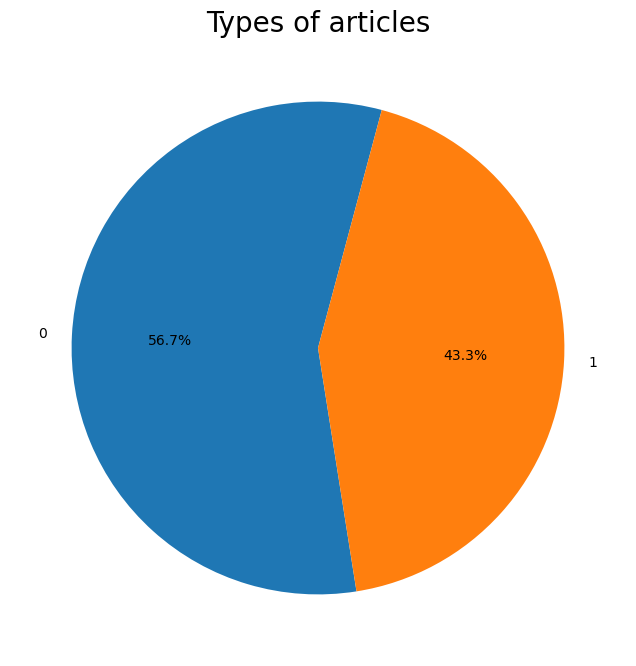

In [39]:
df['label'].value_counts().plot.pie(figsize = (8,8), startangle = 75, autopct='%1.1f%%')
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [57]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
common_words = get_top_n_words(df['preprocessed_text'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams used in articles',color='blue')

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
common_words = get_top_n_bigram(df['preprocessed_text'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used in articles', color='blue')

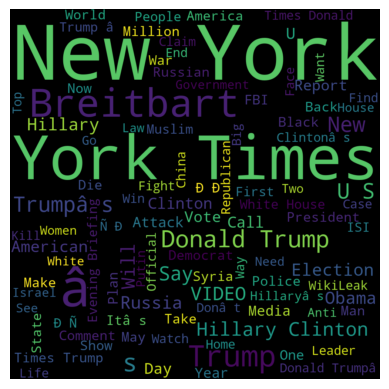

In [67]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['preprocessed_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [72]:
#separating the data and label
X = df['text'].values
Y = df['label'].values

In [73]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train, Y_train)

LogisticRegression()

In [77]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [78]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9729969920700028


In [79]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [80]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9480448455017774


In [83]:
X_new = X_test[180]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
